In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/2d_sims.jl");
include("/home/jm2386/Active_Lattice/src/2d_plot.jl");

v1.1


v2.1


In [3]:
DT, DR, N, Nθ, Δx, Lx, Ly, δt, δ, ϕa, ϕp = (1.0, 1.0, 32, 20, 0.04, 2.0, 2.0, 1e-5, 0.01, 0.5, 0.0);
T, save_interval, param_name = (20.0, 0.1, "test")
v0 = 20.
param = _2d_new_param(DT, v0, DR, N, Nθ, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
ts, ηs = load_compress_sim(param);
t, η = ts[end], ηs[end];

full load


saved


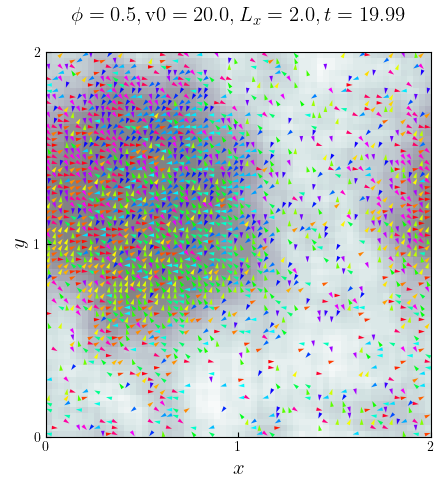

In [4]:
# create fig
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
# add image
    t, η = ts[end], ηs[end]
    plot_eta!(ax, param, t, η; title = true, ϵ = 0.1)
#
display(fig)

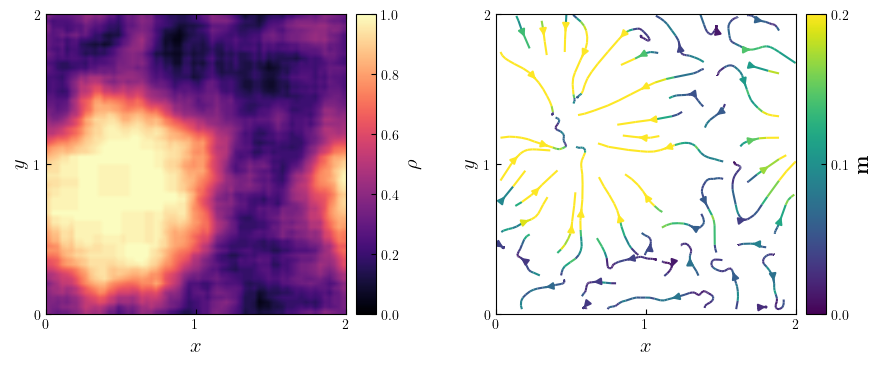

In [5]:
# create fig
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,5))
# add image
    ax      = fig.add_axes([0.1, 0.1, 0.3, 0.6])
    cbar_ax = fig.add_axes([0.41, 0.1, 0.02, 0.6])
    plot_sim_rho(ax, cbar_ax, param, η; cmin = 0.0, cmax = 1.0, cbar = true, ϵ = 0.1)
    ax      = fig.add_axes([0.55, 0.1, 0.3, 0.6])
    cbar_ax = fig.add_axes([0.86, 0.1, 0.02, 0.6])
    plot_sim_mag(ax, cbar_ax, param, η; cmin = 0.0, cmax = 0.2, cbar = true, density = 0.5, ϵ = 0.1)
#
display(fig)

In [19]:
@unpack N₁, ρa, ρp, Lx, N= param
        #collect data
            imag_m = local_polarisation(η; N₁ = N₁, N = N, ϵ = 0.1)


64×64 Matrix{ComplexF64}:
   0.0575955+0.224779im      0.128119+0.186118im    …   0.156519+0.24171im
    0.114877+0.139789im      0.177363+0.144251im         0.17178+0.112903im
  -0.0223684+0.0955085im    0.0755231+0.1002im         0.0904077+0.0854849im
 -0.00375619+0.0781046im    0.0754136+0.0742302im      0.0834312+0.0726864im
   0.0405924+0.0547774im    0.0891356+0.0413638im       0.121474+0.0114861im
 -0.00680052+0.0456058im    0.0139392+0.0537142im   …  0.0811748+0.0187061im
  -0.0182437-0.0302847im  -0.00242242-0.00991458im     0.0309036-0.068564im
  -0.0285002-0.0370422im    -0.023334-0.0438388im      0.0187241-0.0979074im
  -0.0468043+0.0428855im   -0.0347333+0.0320898im      0.0242635-0.00122635im
    0.049593+0.0512871im    0.0309836+0.0429096im      0.0888768+0.0215704im
            ⋮                                       ⋱  
    0.192435+0.0298816im     0.228106+0.00862514im  …   0.175563+0.0333849im
    0.185039-0.0235558im     0.239133-0.0664794im       0.178461-0.0023248

In [21]:
local_density(η; N₁ = N₁, N = N, ϵ = 0.1)

64×64 Matrix{Float64}:
 2.0      2.0      2.0      2.0      …  2.0      2.0      2.0      2.0
 2.0      2.0      1.97959  1.97959     2.0      2.0      2.0      2.0
 1.95918  1.95918  1.93878  1.93878     2.0      1.97959  1.95918  1.95918
 1.87755  1.87755  1.83673  1.83673     1.95918  1.93878  1.89796  1.89796
 1.81633  1.81633  1.7551   1.73469     1.91837  1.89796  1.83673  1.83673
 1.69388  1.69388  1.63265  1.59184  …  1.81633  1.79592  1.73469  1.71429
 1.55102  1.55102  1.4898   1.44898     1.71429  1.69388  1.61224  1.57143
 1.44898  1.44898  1.36735  1.32653     1.59184  1.57143  1.4898   1.44898
 1.32653  1.32653  1.26531  1.22449     1.4898   1.46939  1.40816  1.34694
 1.2449   1.26531  1.20408  1.14286     1.36735  1.36735  1.32653  1.26531
 ⋮                                   ⋱  ⋮                          
 2.0      2.0      2.0      2.0      …  2.0      2.0      2.0      2.0
 2.0      2.0      2.0      2.0         2.0      2.0      2.0      2.0
 2.0      2.0      2.0   

In [61]:
using PyCall
@pyimport matplotlib.animation as anim

fig, axs = plt.subplots(1, 1, figsize=(5,5))
@unpack save_interval = param
scale_factor = 10
interval  = save_interval*scale_factor*1000
frames    = Int64( length(ts)/scale_factor ÷ 1)
function makeframe(i)
        clf()
        ax = fig.add_subplot(111)
        t, η = ts[i+1], ηs[i+1]
        plot_eta!(ax, param, t, η; title = true, ϵ = 0.1)
        return fig
end
myanim = anim.FuncAnimation(fig, makeframe, frames=frames, interval=interval)
# Convert it to an MP4 movie file and saved on disk in this format.
        filename, pathname = pde_vid_save_name(param,ts[end])
        mkpath(pathname)
        myanim[:save](filename, bitrate=-1, dpi= 100, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])